<div style="border:solid green 2px; padding: 20px">

<b>Привет, Андрей! Поздравляю с выполнением очередного проекта!</b>

Меня зовут Петр Раздобреев и я буду проверять твою работу. Попробую помочь сделать тебе её еще лучше! В Практикуме принято общени на ты, но если это дискомфортно, то сообщи об этом)

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ Так выделены небольшие замечания.Такие замечания в проекте допустимы, это пространство для улучшений в будущем.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Так я выделяю успешные идеи.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
    



# Анализ объектов общественного питания в Москве

Описание проекта

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

Описание данных
таблица rest_data:

    id — идентификатор объекта;
    object_name — название объекта общественного питания;
    chain — сетевой ресторан;
    object_type — тип объекта общественного питания;
    address — адрес;
    number — количество посадочных мест.

In [32]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from scipy import stats as st
import plotly.express as px
from plotly import graph_objects as go


## Загрузка данных и подготовка их к анализу

In [33]:
rest_data=pd.read_csv('/datasets/rest_data.csv')
rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [34]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


По общей информации таблицы видно, что типы данных соотвествуют своему смыслу.

### Проверяем наличие пропущенных значений в таблице

In [35]:
rest_data.isna().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

### Проверяем наличие дубликатов в таблице

In [36]:
rest_data[rest_data.columns[rest_data.columns != 'id']].duplicated().sum()

82

In [37]:
#Удаляем дубликаты
rest_data = rest_data.drop_duplicates(subset=['object_name', 'address', 'chain', 'object_type', 'number'])

In [38]:
#Проверяем наши изменения
rest_data[rest_data.columns[rest_data.columns != 'id']].duplicated().sum()

0

Выводы:

Данные отобразились нормально. Типы данных соответствуют своим значениям. Пропущенные значения и дубликаты в таблице не обнаружены. Переходим к анализу данных.

## Анализ данных

### Исследуем соотношение видов объектов общественного питания по количеству

In [39]:
#Создадим сводную таблицу, в которой посчитаем количество объектов по каждому типу 
object_type_count=rest_data.pivot_table(columns='object_type', values='object_name', aggfunc='count')
object_type_count


object_type,бар,буфет,закусочная,кафе,кафетерий,магазин (отдел кулинарии),предприятие быстрого обслуживания,ресторан,столовая
object_name,855,577,349,6071,395,273,1898,2282,2584


In [40]:
object_type_count.sum(axis=1)

object_name    15284
dtype: int64

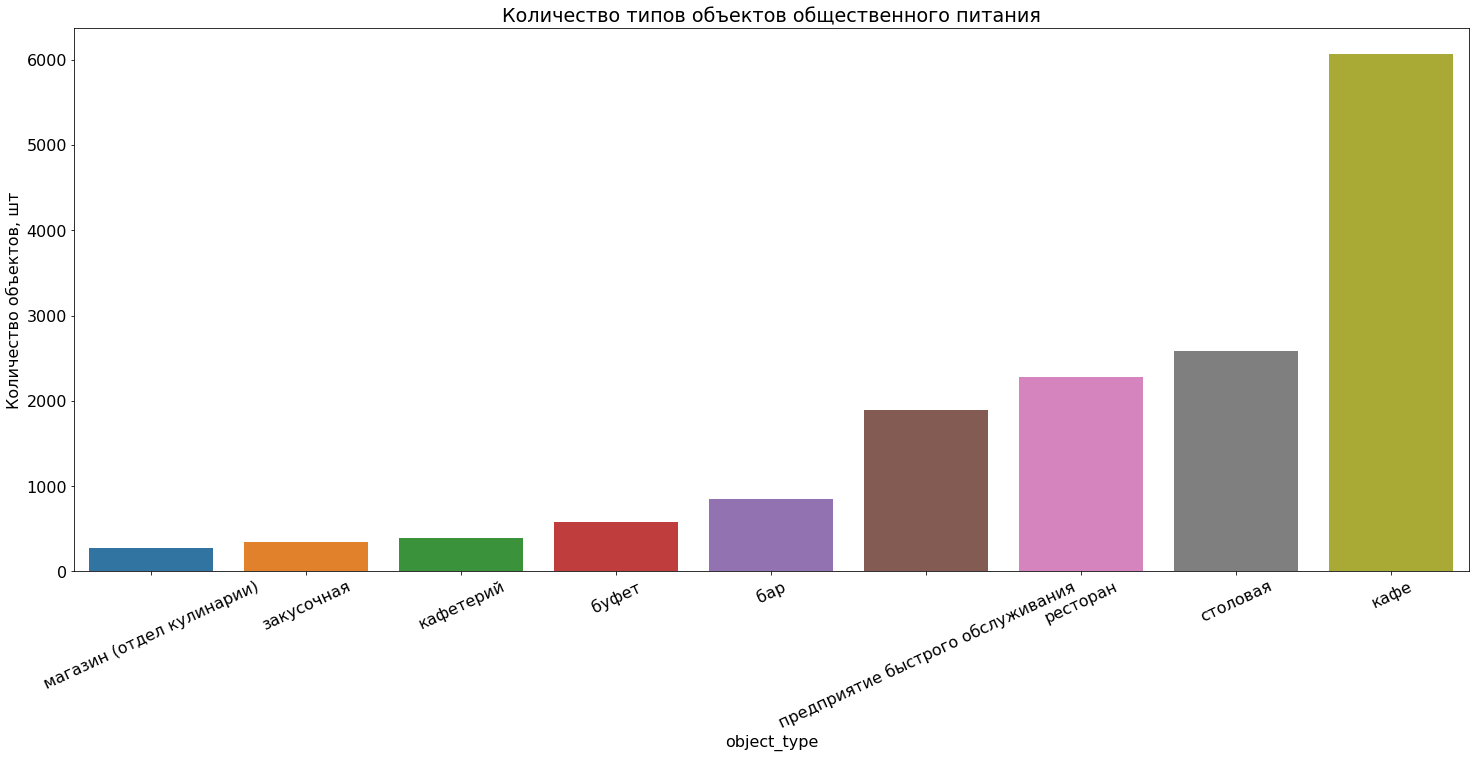

In [41]:
#Построим график столбчатую диаграмму
sbn.set_style()
plt.figure(figsize=(25, 10))
plt.rcParams['font.size'] = '16'

sbn.barplot(data=object_type_count.sort_values(by='object_name', ascending=True, axis=1))
plt.title('Количество типов объектов общественного питания')
plt.ylabel('Количество объектов, шт')
plt.xticks(rotation=25)
plt.show()


Большая часть объектов общественного питания представлена кафе, столовыми, ресторанами и предприятиями быстрого обслуживания. Львиную долю объектов составляют кафе, их доля 40%. Столовых - 17%, ресторанов - 15%,  предприятий быстрого обслуживания - 12,5%.


### Исследуем соотношение сетевых и несетевых заведений по количеству

In [42]:
#Создадим сводную таблицу для подсчета сетевых и не сетевых заведений

chain_count=rest_data.pivot_table(index='chain', values='object_name', aggfunc='count')
chain_count

,object_name
chain,
да,2964
нет,12320


In [43]:
#Построим круговую диаграмму соотношения сетевых и не сетевых объектов общественного питания
plt.figure(figsize=(10, 5))
plt.rcParams['font.size'] = '20'

fig=go.Figure(data=[go.Pie(labels=['сетевые', 'не сетевые'], values=chain_count['object_name'])])
fig.update_layout(title_text='Количество сетевых и не сетевых объектов общественного питания', )
fig.show() 



<Figure size 720x360 with 0 Axes>

Большую часть составляют не сетевые объекты, их доля 80%. Сетевые только 20%. 

### Какими типами объектов представлены сетевые заведения

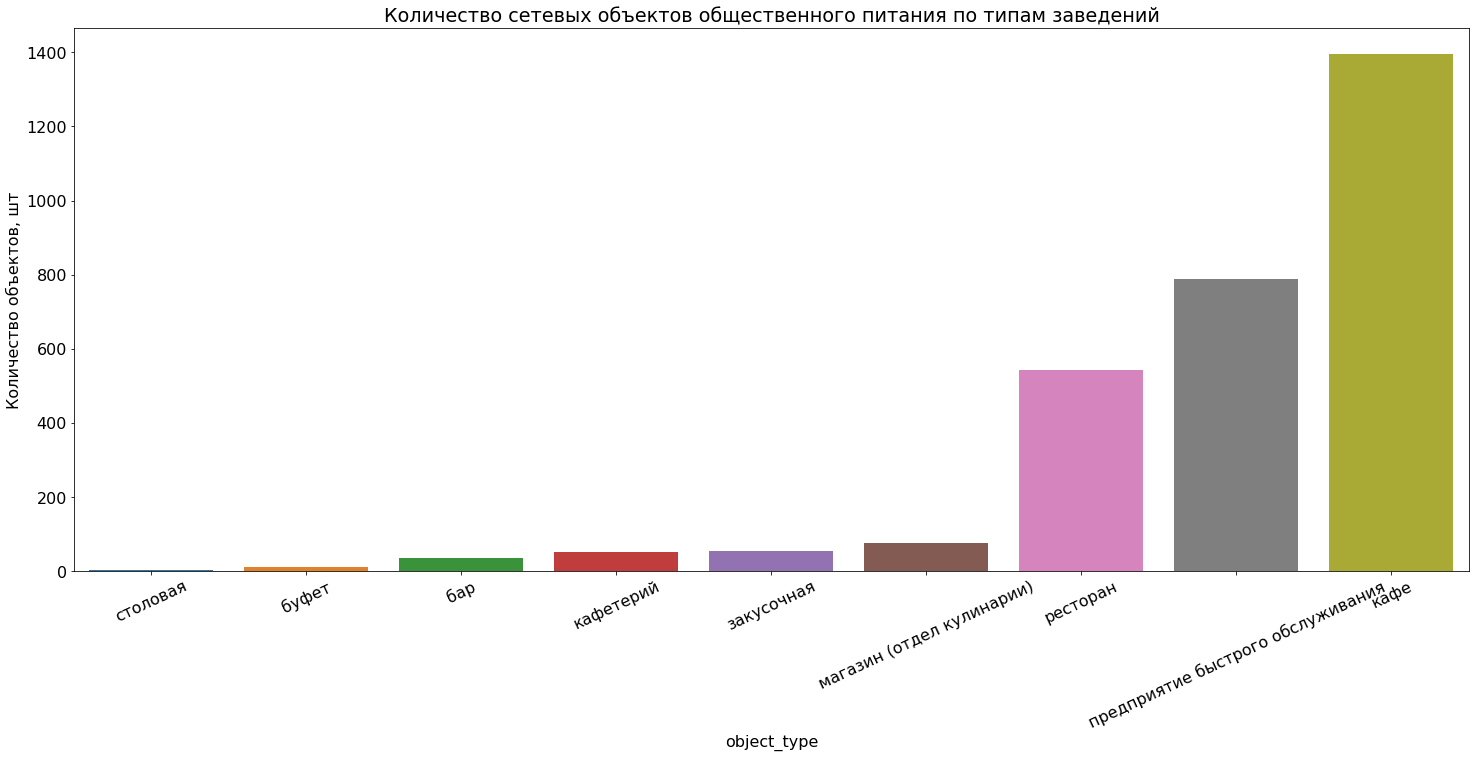

In [44]:
#Строим сводную таблицу только для сетевых объектов общественного питания и сделаем диаграмму их распределения по типам объектов
object_type_chain=rest_data[rest_data['chain']=='да'].pivot_table(columns='object_type', values='object_name', aggfunc='count')

plt.figure(figsize=(25, 10))
plt.rcParams['font.size'] = '16'
sbn.barplot(data=object_type_chain.sort_values(by='object_name', axis=1))
plt.title('Количество сетевых объектов общественного питания по типам заведений')
plt.ylabel('Количество объектов, шт')
plt.xticks(rotation=25)
plt.show()


In [63]:
object_type_chain

object_type,бар,буфет,закусочная,кафе,кафетерий,магазин (отдел кулинарии),предприятие быстрого обслуживания,ресторан,столовая
object_name,37,11,56,1396,52,78,788,543,3


Здесь ситуация немного изменилась, ушли из сетевой группы столовые, остались кафе, рестораны и предприятия быстрого обслуживания. Львиная доля опять принадлежит кафе, она составляет 47%. На 2 место перешли предприятия быстрого обслуживания, их доля 27%. На 3 месте - рестораны, 18,3%.

### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [45]:
#Строим сводную таблицу, в которой посчитаем распределения количество объектов общественного питания и число посадочных мест 
object_type_chain_number=rest_data[rest_data['chain']=='да'].pivot_table(index='number', values='object_name', aggfunc='count')
object_type_chain_number.head()

,object_name
number,
0,265
1,15
2,29
3,16
4,44


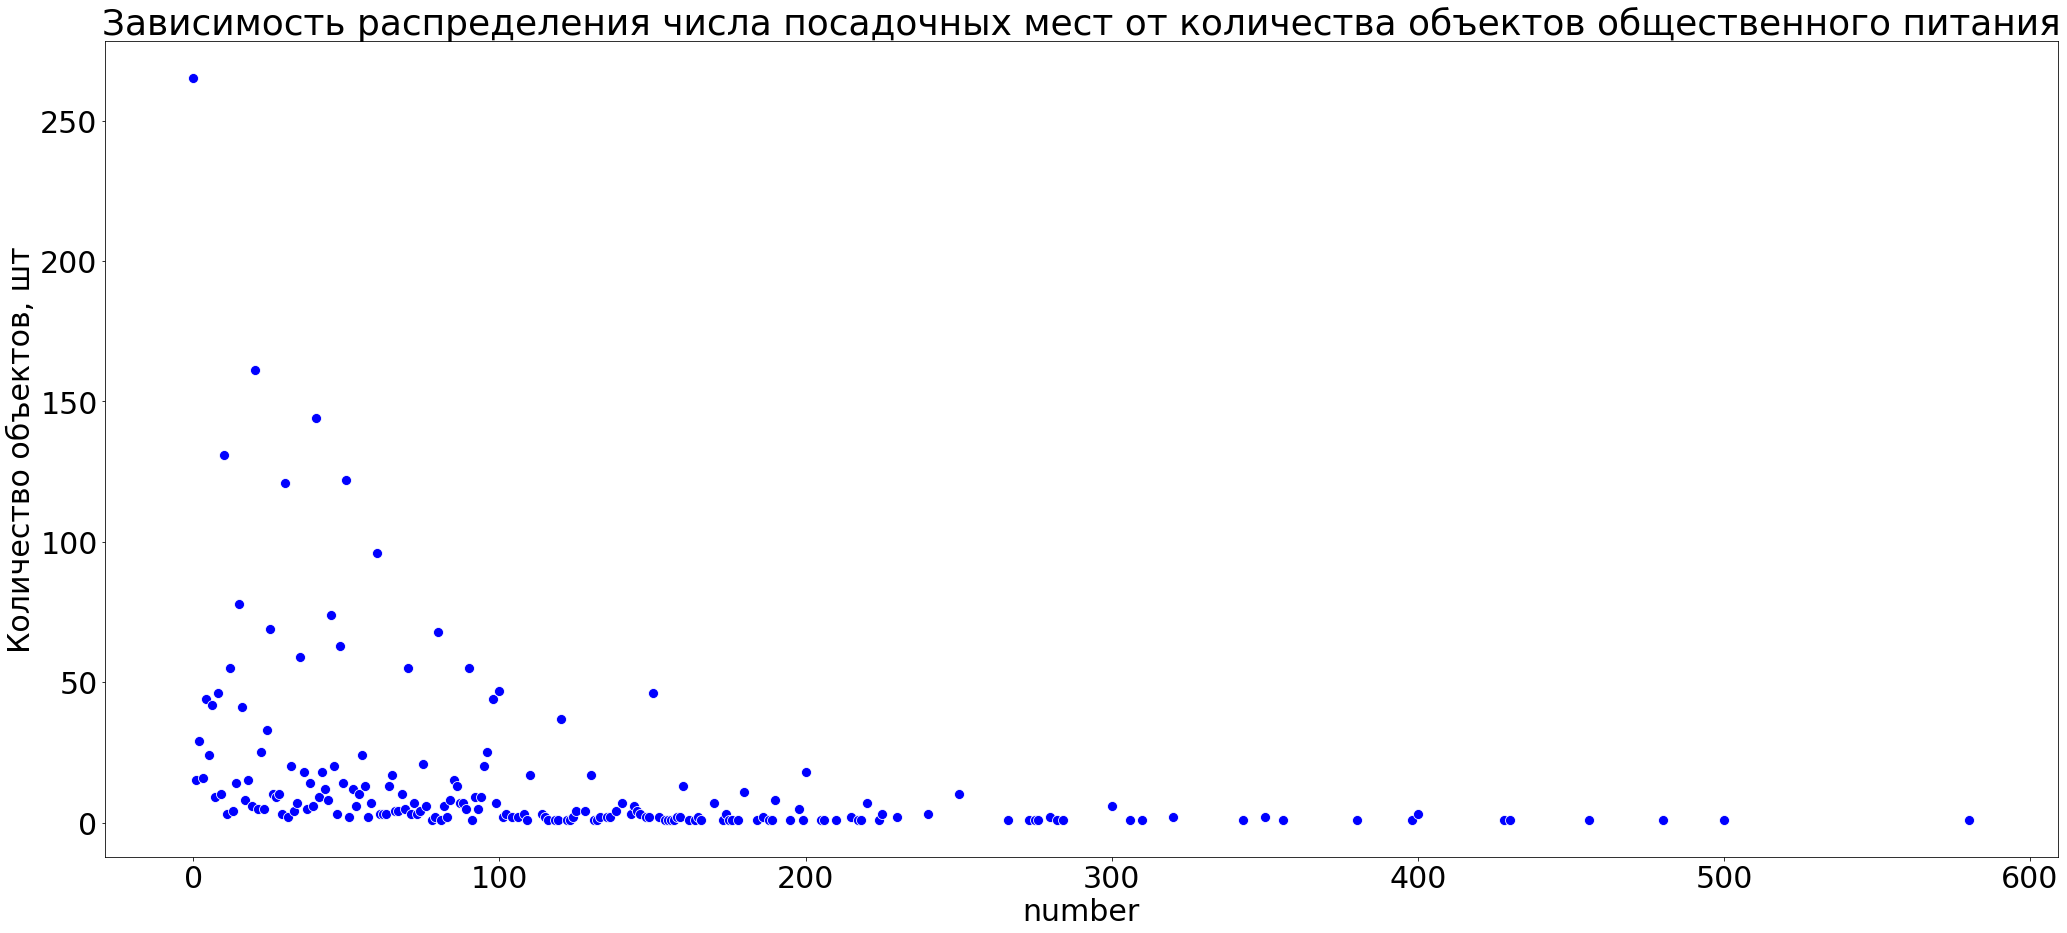

In [46]:
#Строим распределение количества объектов общественного питания и числа посадочных мест 

plt.rcParams['font.size'] = '30'
plt.figure(figsize=(35, 15))
sbn.scatterplot(data=object_type_chain_number,  x=object_type_chain_number.index, y='object_name', color='blue', s=100)
plt.title('Зависимость распределения числа посадочных мест от количества объектов общественного питания')
plt.ylabel('Количество объектов, шт')
plt.show()

По графику видно, что для сетевых заведений характерно малое число объектов с большим количеством посадочных мест.

### Посчитаем среднее количество посадочных мест 

In [47]:
object_type_number=rest_data.pivot_table(columns='object_type', values='number', aggfunc='mean')
object_type_number.sort_values(by='number', axis=1)

object_type,магазин (отдел кулинарии),закусочная,кафетерий,предприятие быстрого обслуживания,кафе,бар,буфет,ресторан,столовая
number,5.589744,7.825215,9.18481,20.808219,39.785703,43.533333,51.509532,96.88475,130.337848


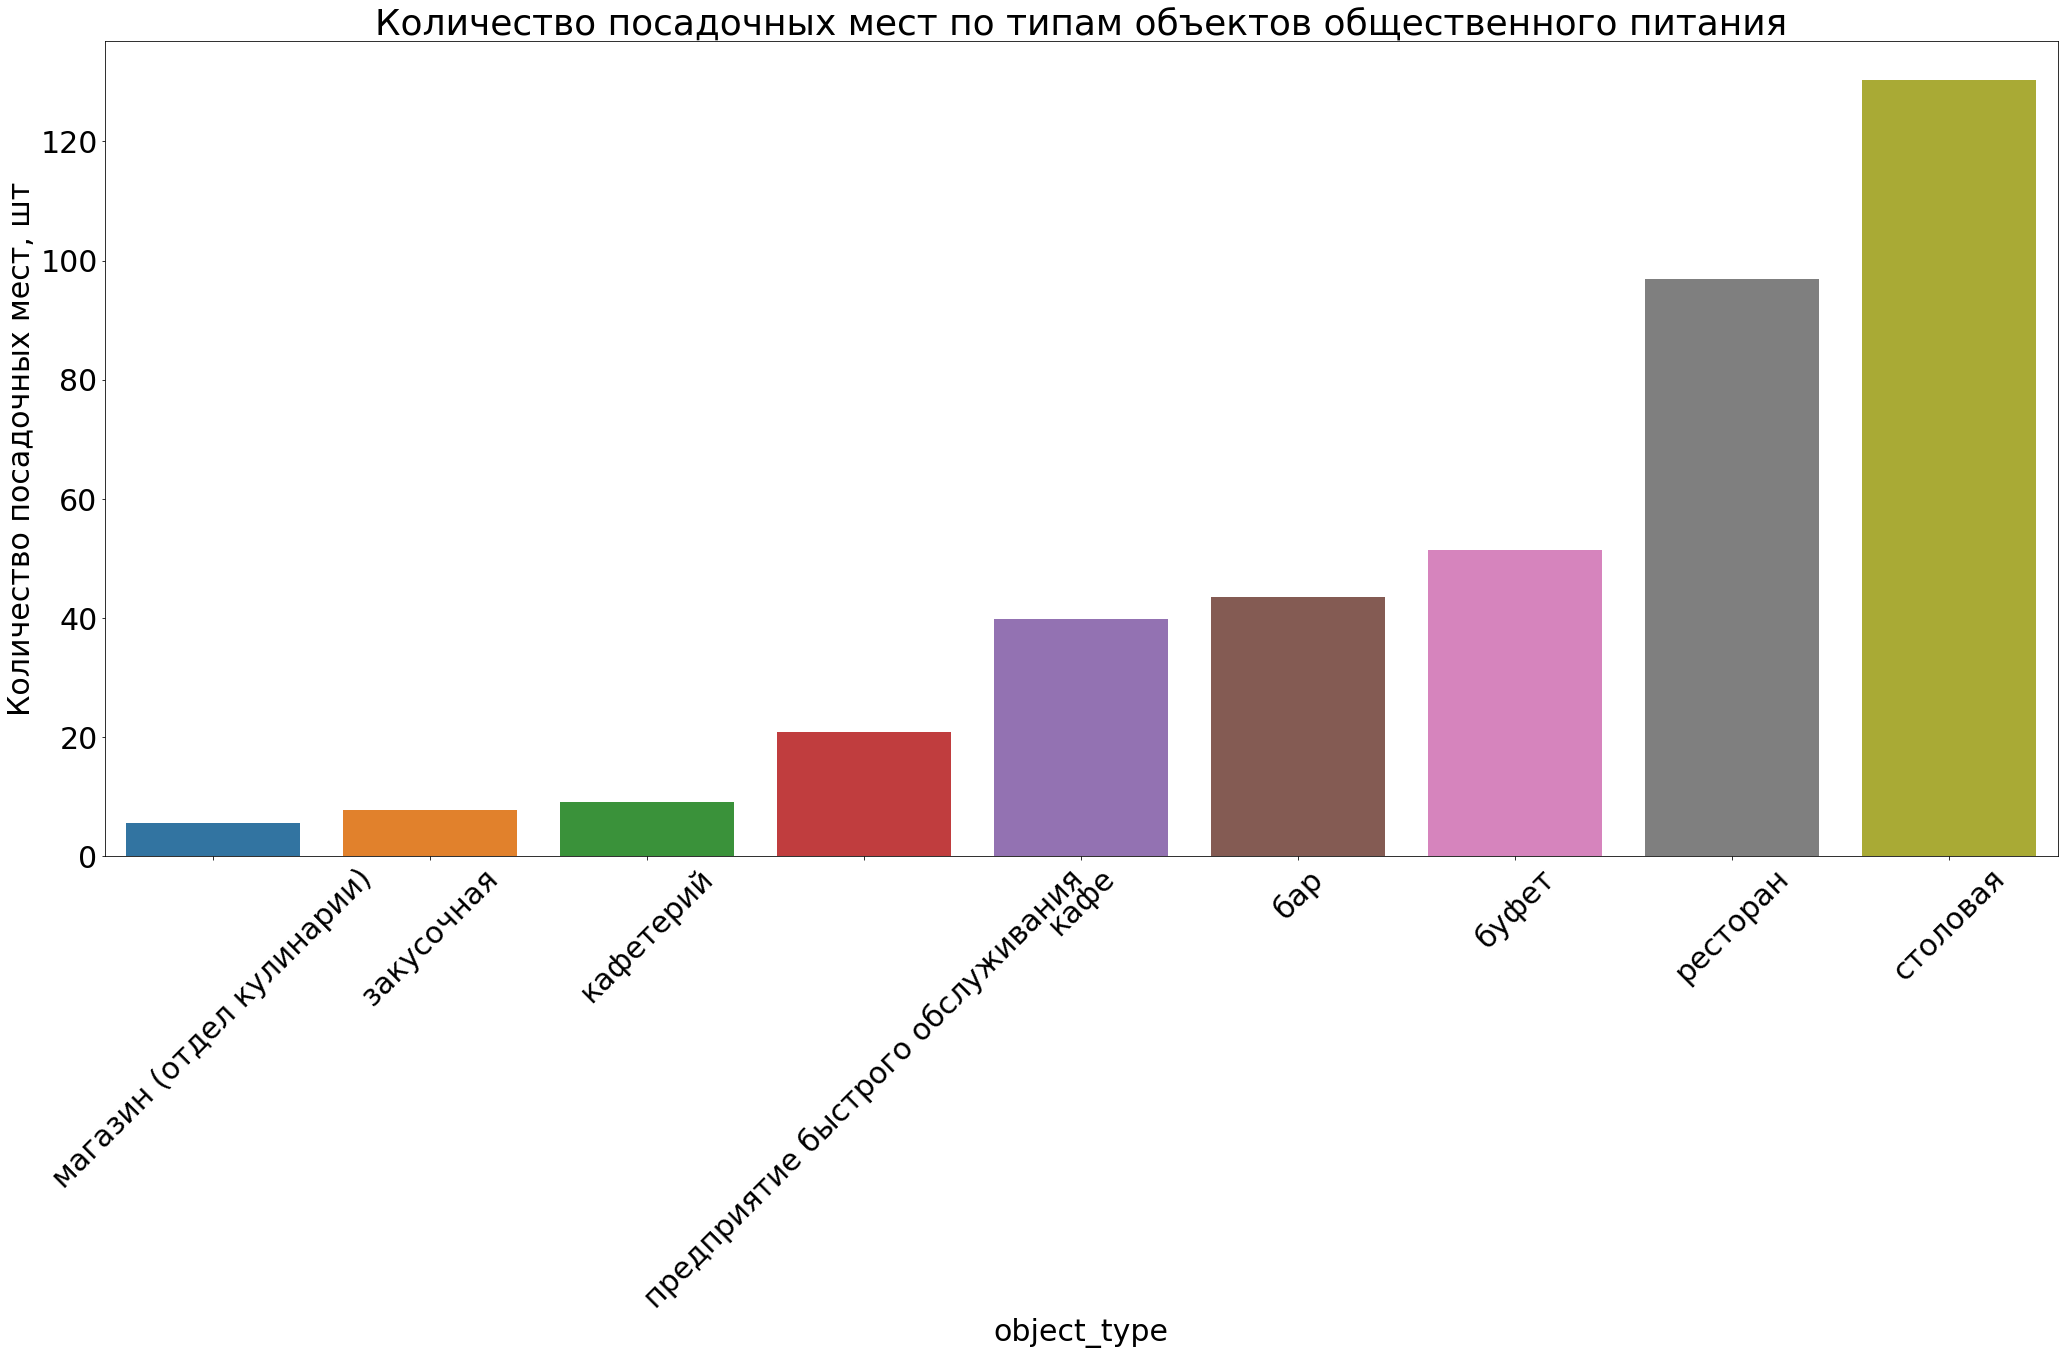

In [48]:
#Строим распределение средного количества посадочных мест по типам объектов
plt.rcParams['font.size'] = '30'
plt.figure(figsize=(35, 15))
sbn.barplot(data=object_type_number.sort_values(by='number', axis=1))
plt.title('Количество посадочных мест по типам объектов общественного питания')
plt.ylabel('Количество посадочных мест, шт')
plt.xticks(rotation=45)
plt.show()


В среднем больше всего посадочных мест в столовых.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
* Здесь лучше бы подшли ящики с усами, при помощи них можно было посмотреть не только на среднее число мест в каждом типе заведения, но оценить и квартили, медиану, насколько значительные выбросы бывают.
* Понравилось, что ты добавила таблицу с числами, чтобы точнее понимать сколько мест в каждом типе заведений, можно подписывать и столбцы, это может показаться сложным, но вот [материал](https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples), если решишься попробовать</div>


### Создадим отдельный столбец с информацией об улице из столбца address

In [49]:

def street(address):
    t=address.split(', ')
    if t[1]=='город Зеленоград' or t[1]=='поселение Сосенское':
        return ', '.join(t[1:3])
    return t[1]

rest_data['street']=rest_data['address'].apply(street)



In [50]:
rest_data.head()

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


In [51]:
rest_data

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,поселение Московский


### Построим график топ-10 улиц по количеству объектов общественного питания

In [52]:
#Создадим сводную таблицу распределения объектов общественного питания по улицам
rest_data_street=rest_data.pivot_table(index='street', values='object_type', aggfunc='count')
rest_data_street_top_10=rest_data_street.sort_values(by='object_type', ascending=False).head(10)
rest_data_street_top_10

,object_type
street,
проспект Мира,204
Профсоюзная улица,181
Ленинградский проспект,170
Пресненская набережная,167
Варшавское шоссе,161
Ленинский проспект,147
проспект Вернадского,128
Кутузовский проспект,114
Каширское шоссе,111


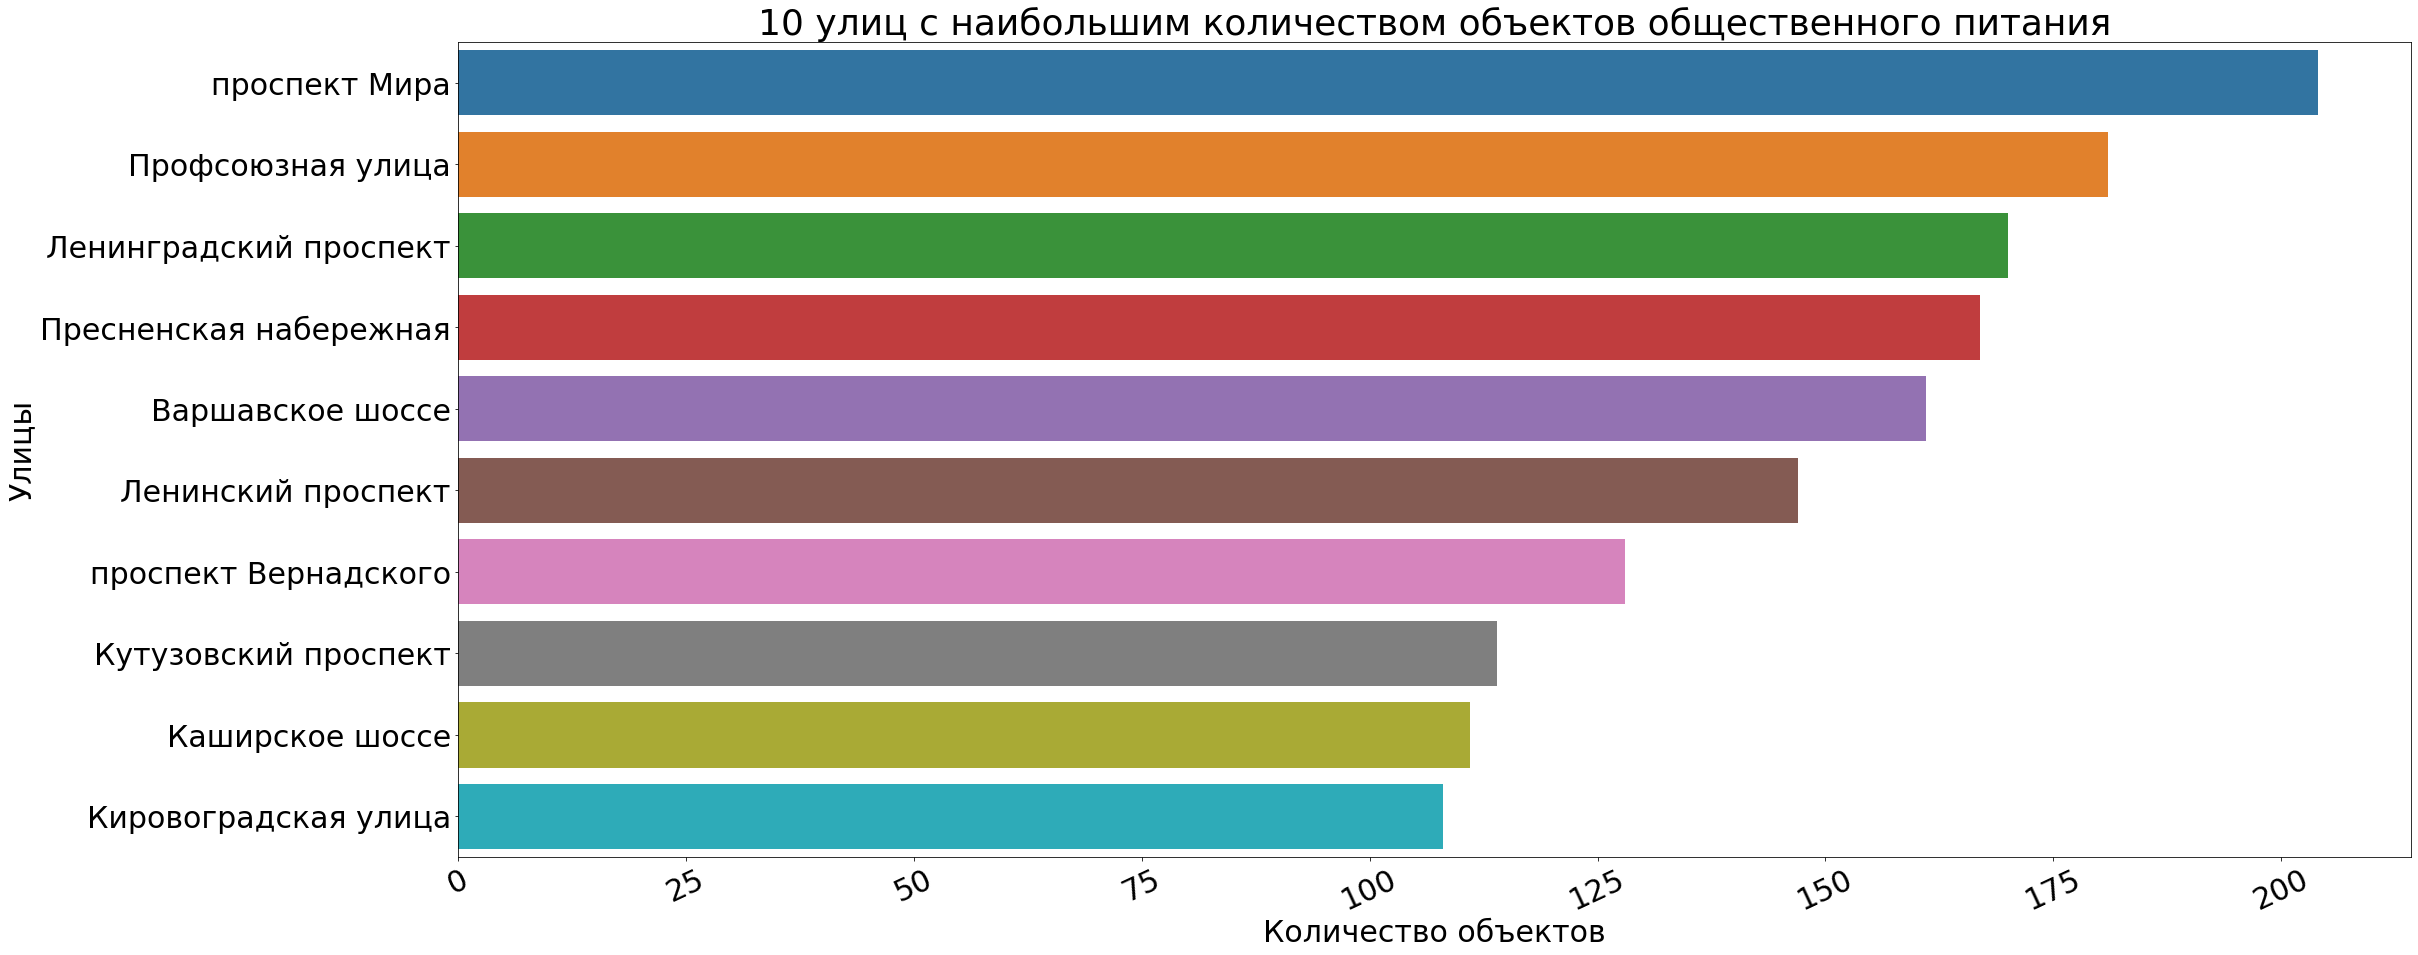

In [53]:
#Строим график топ-10 улиц 
plt.rcParams['font.size'] = '30'
plt.figure(figsize=(35, 15))
sbn.barplot(x='object_type', y=rest_data_street_top_10.index,  data=rest_data_street_top_10)
plt.title('10 улиц с наибольшим количеством объектов общественного питания')
plt.ylabel('Улицы')
plt.xlabel('Количество объектов')
plt.xticks(rotation=25)
plt.show()

In [54]:
#Воспользуемся информацией из интернета и вставим в данные названия округов и районов, по которым проходят эти улицы
from io import BytesIO
import requests
spreadsheet_id = '1jB0T2q4XbQMUOSVmjCMS8cJDhBjdmhJcWcwsV_WcsQM'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
streets = pd.read_csv(BytesIO(r.content))
streets.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [55]:
#Изменим названия на близкие к нашим

streets.rename(columns={'streetname' : 'street', 'areaid' : 'area_id'}, inplace = True)
streets.head()

,street,area_id,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [56]:
#Получим таблицу с названиями округов и районов

moscow_streets_top10=rest_data_street_top_10.merge(streets, on='street', how='left')
moscow_streets_top10.head(10)

,street,object_type,area_id,okrug,area
0,проспект Мира,204,70,СВАО,Алексеевский район
1,проспект Мира,204,86,СВАО,Ярославский Район
2,проспект Мира,204,78,СВАО,Район Марьина роща
3,проспект Мира,204,79,СВАО,Останкинский район
4,проспект Мира,204,81,СВАО,Район Ростокино
5,проспект Мира,204,82,СВАО,Район Свиблово
6,проспект Мира,204,16,ЦАО,Мещанский район
7,Профсоюзная улица,181,123,ЮЗАО,Академический район
8,Профсоюзная улица,181,132,ЮЗАО,Район Черемушки
9,Профсоюзная улица,181,134,ЮЗАО,Район Ясенево


Улицы расположены в Северном административном округе, Северо-Восточном административном округе, Юго-Западном административном округе , Центральном административном округе и Южном административном округе, в районах, которые находятся в центре или ближе к центру города. см. таблицу выше.

### Найдем число улиц с одним объектом общественного питания

In [57]:
#Получим таблицу с названиями округов и районов

moscow_streets=rest_data_street.merge(streets, on='street', how='left')

moscow_streets_1_object=moscow_streets[moscow_streets['object_type']==1]
moscow_streets_1_object.head()

,street,object_type,area_id,okrug,area
2,1-й Балтийский переулок,1,54.0,САО,Район Аэропорт
3,1-й Басманный переулок,1,13.0,ЦАО,Басманный район
4,1-й Басманный переулок,1,15.0,ЦАО,Красносельский район
5,1-й Ботанический проезд,1,82.0,СВАО,Район Свиблово
8,1-й Вешняковский проезд,1,120.0,ЮВАО,Рязанский район


In [58]:
#Посчитаем число улиц с 1 объектом питания 
len(moscow_streets_1_object)

722

Улиц с 1 объектом питания 722. Улицы находятся в по всей Москве, но они не популярны для посещения.

### Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания

####  Сделаем срез исходной таблицы только с топ-10 улицами 

In [59]:
rest_data_top_10=rest_data[rest_data['street'].isin(rest_data_street_top_10.index)]
rest_data_top_10.head()

,id,object_name,chain,object_type,address,number,street
151,155973,Кафе «Андерсон»,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе
152,23618,Кафе «Subway»,да,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,Варшавское шоссе
153,155852,Кафе «Ламаджо»,нет,кафе,"город Москва, Варшавское шоссе, дом 29",30,Варшавское шоссе
154,152556,Шаурма в пите,нет,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,Варшавское шоссе
155,120658,Выпечка,нет,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,Варшавское шоссе


####  Посмотрим на распределение посадочных мест по топ-10 улицам

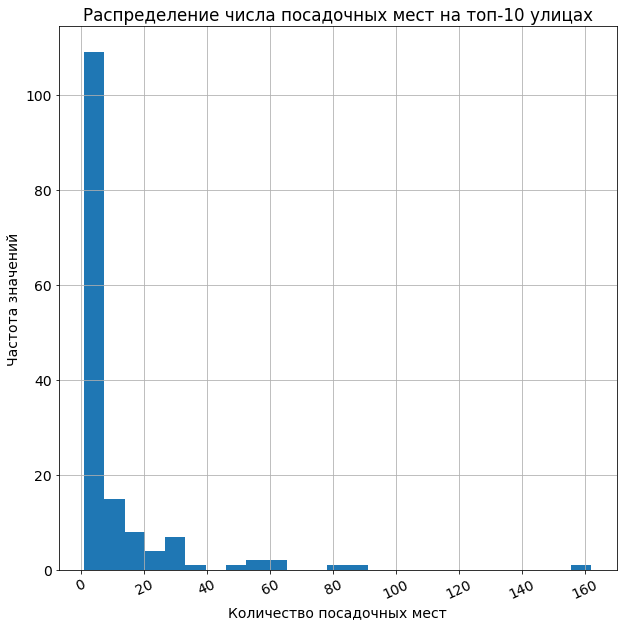

In [60]:
plt.rcParams['font.size'] = '14'
plt.figure(figsize=(10, 10))
rest_data_top_10['number'].value_counts().hist(bins=25)
plt.title('Распределение числа посадочных мест на топ-10 улицах')
plt.grid(True)
plt.ylabel('Частота значений')
plt.xlabel('Количество посадочных мест')
plt.xticks(rotation=25)
plt.show()


В основном значения посадочных мест находятся в пределах от 0 до 60 

####  Для рекомендаций по открытию нового заведения посчитаем распределение медианных значений посадочных мест по топ-10 улицам

In [61]:
#Создадим сводную таблицу с медианными значениями посадочных мест для каждой улицы

rest_data_top_10_number=rest_data_top_10.pivot_table(index='street', values='number', aggfunc='median')
rest_data_top_10_number.columns=['median_number']
rest_data_top_10_number.sort_values(by='median_number', ascending=False)

,median_number
street,
проспект Мира,46.5
Ленинский проспект,45.0
Кутузовский проспект,40.0
Ленинградский проспект,40.0
проспект Вернадского,40.0
Варшавское шоссе,30.0
Кировоградская улица,30.0
Пресненская набережная,30.0
Каширское шоссе,25.0


In [62]:
#Соединим  таблицу с количеством объектов и таблицу с медианными значениями для каждой улицы

street_top_10_number=rest_data_street_top_10.merge(rest_data_top_10_number, on='street', how='left')
street_top_10_number.sort_values(by='object_type',  ascending=False)

,object_type,median_number
street,,
проспект Мира,204,46.5
Профсоюзная улица,181,24.0
Ленинградский проспект,170,40.0
Пресненская набережная,167,30.0
Варшавское шоссе,161,30.0
Ленинский проспект,147,45.0
проспект Вернадского,128,40.0
Кутузовский проспект,114,40.0
Каширское шоссе,111,25.0


Медианное количество посадочных мест необязательно соответсвует положению улицы по числу объектов. Выберем для рекомендации число посадочных мест 40-50.

Общий вывод:

В Москве, объекты общественного питания представлены в основном кафе, столовыми, ресторанами и предприятиями быстрого обслуживания. Львиную долю составляют кафе 40%. 80% заведений относятся не к сетевым объектам. Среди сетевых заведений большую часть составляют кафе 50%. Больше всего посадочных мест в столовых. Самая большая концентрация заведений общественного питания находится на улицах проспект Мира, Профсоюзная улица, Ленинградский проспект, Пресненская набережная, Варшавское шоссе, Ленинский проспект , проспект Вернадского, Кутузовский проспект, Каширское шоссе, Ходынский бульвар, это районы центра или ближе к центру Москвы.

Рекомендуется для открытия нового объекта сделать кафе с числом посадочных мест 40-45, в районах центра или ближе к цетру Москвы, на прохоходящих по ним, улицам: проспект Мира, Профсоюзная улица, Ленинградский проспект, Пресненская набережная, Варшавское шоссе, Ленинский проспект , проспект Вернадского, Кутузовский проспект, Каширское шоссе, Кировоградская улица.


## Подготовка презентации

Презентация: https://disk.yandex.ru/i/A214wji5JSPoOg

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    


Разумные рекомендации, превосходная работа. Если интересно, то используя геокодер (или датасет с координитами для адресов) и геовизуализацию можно построить распределение кафе на территории Москвы и выделить интересующие нас районы, затем в этих районах можно отобразить доступные площащи для аренды, спарсив какой-нибудь сайт объявлений и таким образом выбрать нужное местоположение. https://geocoder.readthedocs.io/ + https://python-visualization.github.io/folium/quickstart.html. Этим можно заняться, если захочется вернуться к проекту
    
    
**Касательно презентации:**     
* Можно было бы добавить слайд с постановкой задач, выводы исследования, автора
* Рекомендую добавить нумерацию слайдов, чтобы заказчики могли задать вопрос по твоей презентации не с "верните на вон тот слайд с ...", а просто по номеру слайда
* Хотелось бы ссылок на источник информации
* Рекомендую добавлять рамку для отделения графиков от остальной части презентации и их выравнивать от слайда к слайду, а сейчас при переключении есть ощущения, что графики всегда в разных местах
   
Для оформления презентаций могу порекомендовать сервис https://readymag.com/. Там множество визуальных элементов и можно включать кучу сеток, чтобы выравнивать контент по слайдам или вот ещё классный есть: https://www.canva.com/ru_ru/
</div>